La función de coste nos indica cual es el error para cada una de las combinaciones de nuestros parametros

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [3]:
#función a optimizar
#func = lambda th: np.sin((1/2)*x**2 - (1/4)*y**2+3) * np.cos(2*x+1-np.e**y)
#Creación de una función anonima
    #th para referirse al vector de parametros
    
func = lambda th: np.sin((1/2)*th[0]**2 - (1/4)*th[1]**2+3) * np.cos(2*th[0]+1-np.e**th[1])
    

In [6]:
func([5,3])
    #Esta es una figura de 3 dimensiones, donde se tiene el valor de x y con el valor que da 
     #como resultado esta ecuación

-0.5956138973318122

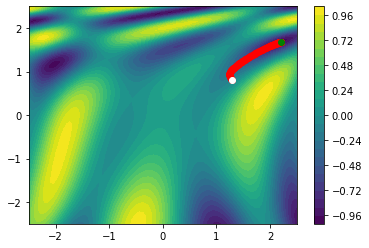

In [43]:
res=100

gp=2.5

_X=np.linspace(-gp,gp,res)
_Y=np.linspace(-gp,gp,res)
_Z=np.zeros((res,res)) #Variable que va a guardar todos los valores

for ix,x in enumerate(_X): #Cuando utilizamos enumerate, se recorre el vector y para cada elemento devuelve su indice y su valor
    for iy,y in enumerate(_Y):
        _Z[iy,ix]=func([x,y]) #llena la matriz con cada uno de los valores que toma la función
        
        #_Z = func(np.meshgrid(_X, _Y))
            #Esa línea de código hace lo mismo que los FOR anidados
        


plt.contourf(_X,_Y,_Z,25)
plt.colorbar()

#Ahora vamos a generar un punto aleatorio sobre esta superficie
Theta=np.random.rand(2)*gp*2-gp

_T=np.copy(Theta)

h=0.001
lr=0.001

wh=np.copy(Theta)

grad = np.zeros(2)

#En vez de aplicar las derivadas parciales, utilizamos el método de diferencias finitas

for _ in range(100000):

    for it,th in enumerate (Theta):
        
        _T = np.copy(Theta)

        _T[it] = _T[it] + h

        deriv = (func(_T) - func(Theta))/h

        grad[it] = deriv


    Theta = Theta - lr*grad   
            
    
    if(_ %25 == 0):
        plt.plot(Theta[0],Theta[1],"o",c="red")
    
plt.plot(Theta[0],Theta[1],"o",c="green")
plt.plot(wh[0],wh[1],"o",c="white")

plt.show()

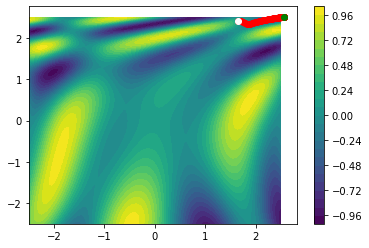

In [50]:
res=100

gp=2.5

_X=np.linspace(-gp,gp,res)
_Y=np.linspace(-gp,gp,res)   
_Z = func(np.meshgrid(_X, _Y))
            #Esa línea de código hace lo mismo que los FOR anidados
        





#Ahora vamos a generar un punto aleatorio sobre esta superficie
Theta=np.random.rand(2)*gp*2-gp

_T=np.copy(Theta)

h=0.001
lr=0.001

start_point=np.copy(Theta)

grad = np.zeros(2)

for _ in range(100000):

    for it,th in enumerate (Theta):
        
        _T = np.copy(Theta)

        _T[it] = _T[it] + h

        deriv = (func(_T) - func(Theta))/h

        grad[it] = deriv


    Theta -= lr*grad   
            
    
    if(_ %25 == 0):
        plt.plot(Theta[0],Theta[1],"o",c="red")
        
plt.contourf(_X,_Y,_Z,25)
plt.colorbar()
    
plt.plot(Theta[0],Theta[1],"o",c="green")
plt.plot(start_point[0],start_point[1],"o",c="white")

plt.show()